## Графы, библиотека ```networkx```

Модель, которая не только описывает элементы системы, но и фиксирует связи между ними, называется **графом** или **сетью**. В терминах графов может быть описана любая система, в которой можно выделить

+ элементы (в графе они называются узлами = вершинами = nodes = vertices)
+ связи между ними (они именуются рёбрами = связями = edges = relations).

Граф -- это визуализация сложного объекта. Кроме того, граф — это математический объект, в котором мы можем довольно много всего посчитать, и таким образом установить разные закономерности, доказать гипотезу. Это называется **сетевым анализом**.

Для того, чтобы превращать данные (любые формализованные данные) в граф, можно использовать библиотеку `networkx`. Вот ее [документация](https://networkx.github.io/documentation/latest/index.html). Это не единственная библиотека для работы с графами в питоне ([вот полный список](https://wiki.python.org/moin/PythonGraphLibraries)), но, кажется, самая простая и удобная.

In [123]:
import networkx as nx

#### Создаем граф

Первая ситуация: у нас есть какие-то данные, и нам нужно превратить их в граф. Тогда уместно создать сначала пустой объект графа и туда постепенно что-то добавлять.

In [124]:
G = nx.Graph() # пустой граф

Добавляем узлы:

In [125]:
G.add_node(1) # добавляем один узел

In [126]:
G.add_nodes_from([2 ,3, 4, 5, 6]) # добавляем несколько узлов сразу

In [127]:
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "blue"}),])

In [128]:
G.remove_node(6) # удаляем узел номер 6

In [129]:
# То, как мы обозначаем узлы (1, 2, 3 ...) -- это их id. Но вообще-то мы можем приклеить к ним и полноценные лейблы:
G.add_node(1, label="node_1")

Теперь укажем, какие узлы связаны между собой рёбрами.

In [130]:
G.add_edge(1,2) # ребро между узлами 1 и 3
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 3), (1, 4), (1, 5), (4, 5), (3, 5)]) # сразу несколько рёбер

G.remove_edge(4, 5) # удаляем ребро

In [131]:
print('узлы', G.nodes())
print('рёбра', G.edges())

узлы [1, 2, 3, 4, 5]
рёбра [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (3, 5)]


In [132]:
G.number_of_nodes()

5

In [133]:
G.number_of_edges()

6

In [134]:
# сколько ребер исходят из узла 5
G.degree(5)

2

In [135]:
# число ребер для каждого узла
for node in G.nodes():
    print (node, G.degree(node))

1 4
2 2
3 3
4 1
5 2


In [136]:
list(G.adj[5])  # узлы-соседи узла 5 (те узлы, которые связаны с ним ребром)

[1, 3]

In [137]:
list(G.neighbors(5)) # узлы-соседи узла 5

[1, 3]

Кроме того, что графы отражают связи между узлами, они могут отражать характер этой связи. В теории графов выделяются специальные взвешенные графы, у которых между узлами не просто есть ребро, но у этого ребра ещё есть вес. Взвешенным графом, например, может быть граф персонажей какой-то пьесы, в котором мы учитываем не только то, что персонажи этой пьесы находятся вместе на сцене (ребро), но и сколько раз они вступают в диалог (вес ребра).

In [138]:
# вес ребра можно добавить так:

G.add_edge(1, 3, weight=4)

Отдельно выделяются направленные графы, которые отражают как наличие, так и направление связи. Например, граф переписки может отражать направление связи, кто кому писал. Или, например, можно отражать направление лексических/грамматических переходов. Такой граф задаётся как специальный тип объекта:

In [139]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1,4,0.5), (3,1,0.75)]) # от кого -- кому и вес ребра

Итак, суммируем. Графы бывают:

+ ориентированные (направленные) и неориентированные (связи-стрелочки vs обычные связи)
+ связные и несвязные (все узлы связаны vs есть узлы, которые оторваны от основного графа).
+ взвешенные и невзвешенные (связи имеют некоторое числовое значение или нет)


Задать разные виды графов:

+ ```Graph``` - обычный граф, две вершины могут быть соединены 1 ребром, это ребро обозначает обоюдную связь
+ ```DiGraph``` - направленный граф, связи имеют направление
+ ```MultiGraph``` - граф, где две вершины могут быть соединены разными параллельными ребрами (обоюдными)
+ ```MultiDiGraph``` - направленный граф с возможностью нескольких параллельных ребер


#### Сохраняем и подгружаем граф

Когда граф построен, его можно сохранить в каком-нибудь специальном формате.

+ csv-таблица узлов/ребер
+ gml (Graph Modelling Language) — простейший текстовый формат записи графа
+ graphml — основанный на XML формат для записи графов
+ gexf (Graph Exchange XML Format) — также основан на XML, позволяет описывать не только структуру и элементы графа, но и метаданные, иерархию, динамику — в общем, самый продвинутый формат

Чтобы сохранить граф в виде файла в формате .gexf, достаточно вот такого кода:

In [140]:
nx.write_gexf(G, 'graph_file.gexf')

Загрузить данные из этого формата можно тоже одной строчкой:

In [141]:
G1 = nx.read_gexf('graph_file.gexf')

#### Визуализация

Визуализируем граф с помощью уже знакомого нам `matplotlib` (но есть и [другие способы визуализации](https://networkx.github.io/documentation/networkx-2.2/reference/drawing.html) графов в питоне).

In [142]:
DG = nx.DiGraph()

DG.add_edges_from([('blue', 'navy'), ('green', 'blue'), ('navy', 'black'), ('black', 'blue')])

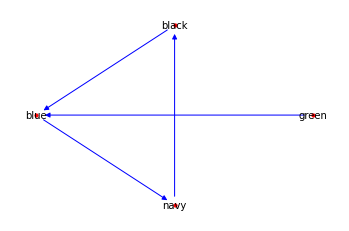

In [144]:
import matplotlib.pyplot as plt 

#надо выбрать способ "укладки" графа: random_layout, shell_layout, spring_layout
pos=nx.shell_layout(DG)

nx.draw_networkx_nodes(DG, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(DG, pos, edge_color='blue')
nx.draw_networkx_labels(DG, pos, font_size=10)
plt.axis('off') 
plt.show()

Давайте изобразим [граф концепта DECEIT из CLICS](https://clics.clld.org/graphs/subgraph_13)

In [145]:
DECEIT = nx.Graph()

DECEIT.add_weighted_edges_from([('SLEEP', 'LIE (MISLEAD)', 3), ('LIE (MISLEAD)', 'PERJURY', 13), ('LIE (MISLEAD)', 'DECEIT', 43), ('PERJURY', 'DECEIT', 8), ('DECEIT', 'BETRAY', 6), ('BETRAY', 'SELL', 25), ('SELL', 'GIVE', 27), ('GIVE', 'BETRAY', 9), ('DECEIT', 'WRONG', 5), ('WRONG', 'BAD', 27), ('WRONG', 'CROOKED', 12), ('WRONG', 'GUILTY', 33), ('WRONG', 'FAULT', 26), ('WRONG', 'MISS (A TARGET)', 5), ('WRONG', 'MISTAKE', 37), ('MISTAKE', 'CROOKED', 3), ('MISTAKE', 'FAULT', 71), ('MISTAKE', 'MISS (A TARGET)', 13), ('MISS (A TARGET)', 'FAULT', 4), ('FAULT', 'GUILTY', 9)])

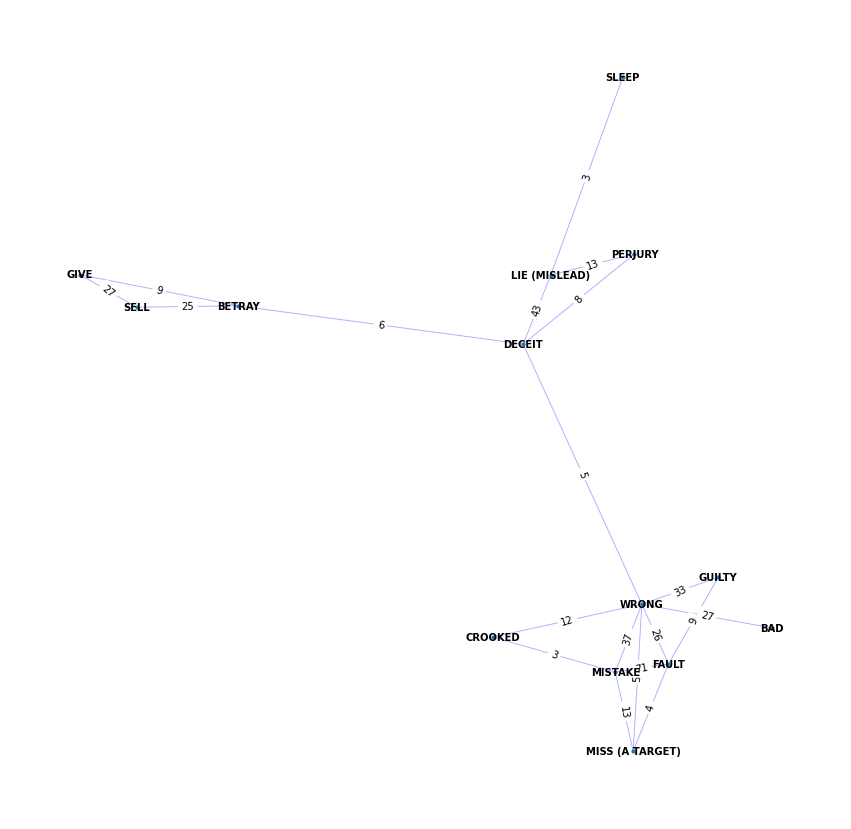

In [91]:
import matplotlib.pyplot as plt 

#надо выбрать способ "укладки" графа: random_layout, shell_layout, spring_layout
pos=nx.spring_layout(DECEIT)

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(DECEIT, pos, node_size=10) 
labels = nx.get_edge_attributes(DECEIT,'weight')
nx.draw_networkx_edge_labels(DECEIT, pos, edge_labels=labels)
nx.draw_networkx_edges(DECEIT, pos, alpha=0.3, edge_color='blue')
nx.draw_networkx_labels(DECEIT, pos, font_size=10, font_weight='bold')
plt.axis('off') 
plt.show()

#### Сетевой анализ

Что мы можем узнать про граф?

In [101]:
# Диаметр графа, самый длинный кратчайший путь от одной вершины до другой
print(nx.diameter(DECEIT))

4


In [103]:
print('Среднее расстояние: ', nx.average_shortest_path_length(DECEIT))

Среднее расстояние:  2.5054945054945055


In [96]:
print(DECEIT.number_of_nodes())
print(DECEIT.number_of_edges())

14
20


In [97]:
# Плотность графа: отношение числа имеющихся рёбер графа к максимально возможному количеству рёбер

print(nx.density(DECEIT))

0.21978021978021978


In [98]:
# Коэффициент ассортативности (насколько вся сеть завязана на основных "хабах" = узлах с большим количеством связей):

print(nx.degree_pearson_correlation_coefficient(G))

-0.1904761904761904


+ **Диаметр** — самый длинный кратчайший путь от одной вершины до другой. Любая последовательность ребер, которая соединяет узлы, называется путь. Чаще всего в исследованиях рассматривается простой путь, то есть путь без циклов и повторяющихся узлов. Кратчайший путь между двумя узлами называют геодезическим расстоянием. Самый длинный кратчайший путь в графе называют его диаметром, однако он очень чувствителен к отклонениям (одна цепочка в многомиллионном графе может изменить его диаметр). 

+ Ещё одной очень информативной характеристикой считается **среднее расстояние между узлами**, которое можно получить, взяв среднее значение всех кратчайших путей в графе. Среднее расстояние определяется структурой графа: если граф построен в форме цепочки, оно будет большим, но чем теснее связаны узлы, тем меньше становится и среднее расстояние. 

+ [**Связная компонента**](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82%D0%B0_%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B3%D1%80%D0%B0%D1%84%D0%B0) - узлы, связанные между собой рёбрами

+ **Коэффициент ассортативности (assortativity coefficient)** определяет, с кем связаны узлы-хабы (с большим количеством связей): если с другими узлами-хабами, то значение коэффициента высокое, а если нет – низкое.

+ **Плотность графа (density)** – отношение числа ребер к максимально возможному. В сообществах, высокий коэффициент кластеризации и высокая плотность.

+ **Степень, или мощность узла (degree)** – это количество его связей.

+ **Взвешенная степень (weighted degree)** – это количество связей узла, разделенное на общее количество связей в графе.

+ **Важность** узла можно определять разными способами:
    + **degree centrality**: центральность по степени, у кого больше связей, тот и важнее
    + **closeness centrality**: чем центральнее узел (т.е. чем короче путь от него до всех остальных узлов), тем он важнее; центральность по близости - насколько доступны для вершины другие узлы. Это означает, что вершина довольно хорошо связана с другими, даже если это не ближайшие соседи, связанные непосредственной связью. Но через пару шагов можно добраться до другого узла. Если это люди, то такому человеку легко доступна информация, он быстро может кого-то найти через друзей
    + **betweenness centrality**: количество кратчайших путей, проходящих через узел; центральность по посредничеству - это важный показатель, который основан на доле кратчайших путей между разными парами вершин, которые проходят через эту точку. То есть эта точка является важным проводником между группами вершин или в целом вершинами. Например, есть две враждующие группы и есть какой-то посредник, через которого можно передать информацию. Такой персонаж очень важен
    + **eigencentrality**: чем больше друзей у твоих друзей, тем ты важнее

Все это можно посчитать с помощью `networkx`, вот [соответсветствующий раздел документации](https://networkx.github.io/documentation/networkx-2.2/reference/algorithms/centrality.html).

In [104]:
from collections import Counter

In [105]:
# Выделение связных компонент

components = nx.components.connected_components(DECEIT)

component_lengths = Counter([len(i) for i in components])

component_lengths.most_common()

[(14, 1)]

In [106]:
components = nx.components.connected_components(DECEIT)
nodes = sorted([(i, len(i)) for i in components], key=lambda x: x[1], reverse=True)[0][0]
len(nodes)

14

In [107]:
# Подграф 
B = DECEIT.subgraph(nodes)

In [147]:
deg = nx.degree_centrality(DECEIT)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

WRONG
DECEIT
FAULT
MISTAKE
LIE (MISLEAD)
BETRAY
MISS (A TARGET)
PERJURY
SELL
GIVE
CROOKED
GUILTY
SLEEP
BAD


In [112]:
b = nx.betweenness_centrality(DECEIT)
for nodeid in sorted(b, key=b.get, reverse=True):
    print(nodeid)

DECEIT
WRONG
BETRAY
LIE (MISLEAD)
FAULT
MISTAKE
SLEEP
PERJURY
SELL
GIVE
BAD
CROOKED
GUILTY
MISS (A TARGET)


In [113]:
b = nx.closeness_centrality(DECEIT)
for nodeid in sorted(b, key=b.get, reverse=True):
    print(nodeid)

DECEIT
WRONG
BETRAY
LIE (MISLEAD)
FAULT
MISTAKE
PERJURY
MISS (A TARGET)
CROOKED
GUILTY
BAD
SELL
GIVE
SLEEP


In [116]:
b = nx.eigenvector_centrality(DECEIT)
for nodeid in sorted(b, key=b.get, reverse=True):
    print(nodeid)

WRONG
FAULT
MISTAKE
MISS (A TARGET)
CROOKED
GUILTY
DECEIT
BAD
LIE (MISLEAD)
PERJURY
BETRAY
SELL
GIVE
SLEEP


**Коэффициент кластеризации (clustering coefficient)** – степень взаимодействия между собой ближайших соседей узла, т.е. вероятность того, что ближайшие соседи узла будут связаны не только с ним, но и между собой.

In [117]:
print(nx.average_clustering(DECEIT))
print(nx.transitivity(DECEIT)) # транзитивен ли граф, есть ли в нём треугольники?

0.6003401360544218
0.4528301886792453


**Модулярность (modularity)** показывает, насколько при заданном разбиении графа на группы плотность связей внутри группы больше плотности связей между группами. С помощью этой метрики граф разбивается на сообщества.

**Сообщество** – это плотный подграф, где все (или почти все) узлы связаны между собой.

In [118]:
from networkx.algorithms import community

[Вот тут](https://networkx.github.io/documentation/latest/reference/algorithms/community.html) можно найти алгоритмы для выделения сообществ.

In [120]:
communities_generator = community.girvan_newman(DECEIT) # убирает постепенно по ребру с наиболее высокой betweenness centrality
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [['BAD', 'CROOKED', 'FAULT', 'GUILTY', 'MISS (A TARGET)', 'MISTAKE', 'WRONG'], ['BETRAY', 'DECEIT', 'GIVE', 'LIE (MISLEAD)', 'PERJURY', 'SELL', 'SLEEP']]
next level communities: [['BAD', 'CROOKED', 'FAULT', 'GUILTY', 'MISS (A TARGET)', 'MISTAKE', 'WRONG'], ['BETRAY', 'GIVE', 'SELL'], ['DECEIT', 'LIE (MISLEAD)', 'PERJURY', 'SLEEP']]


In [122]:
communities_generator_2 = community.greedy_modularity_communities(DECEIT) # данный алгоритм использует модулярность, которая в свою очередь опирается на плотность связей внутри группы
communities_generator_2

[frozenset({'BAD',
            'CROOKED',
            'FAULT',
            'GUILTY',
            'MISS (A TARGET)',
            'MISTAKE',
            'WRONG'}),
 frozenset({'DECEIT', 'LIE (MISLEAD)', 'PERJURY', 'SLEEP'}),
 frozenset({'BETRAY', 'GIVE', 'SELL'})]

#### Gephi

Программа Gephi умеет делать вещи намного красивее, чем `matplotlib`, так что можно создать граф с помощью питона, а потом загрузить его в Gephi и считать статистику по графу и визуализировать его уже там. Или можно задать граф в csv-файлах (нужны отдельные файлы для узлов и для рёбер) и отредактировать, разбить на сообщества в Gephi. 

#### Статьи с использованием графов

Библиография по лингвистическим (+ когнитивным) статьям, где используются графы:

https://cqllab.upc.edu/biblio/networks/

Обзор одной из этих статей может стать темой вашего эссе 